## Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.facecolor':'white'})


## Radius + Path

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.facecolor':'white'})

version = "f3_2rnn_8" #"v11_fast_big_120"
eval_dir = f"cl_{version}"
train_dir = f"train_{version}"
num_drones = 8
# train_dir = f"train_v11"

In [11]:
mean_radii = []
last_radii = []
counter = 0
target_radius = 1.0

fig, axs = plt.subplots(2, num_drones // 2, figsize=(20, 8))
axs = axs.flatten()

for i, folder in enumerate(sorted(os.listdir(eval_dir))[:]):
    try:
        for d in range(num_drones):
            radius = np.loadtxt(os.path.join(eval_dir, folder, f"radius{d}.csv"), delimiter=",")
            axs[d].plot(np.linspace(0, 1, radius.shape[0]), radius)
            # plt.show()
            mean_radii.append(np.mean(np.abs(radius - target_radius)))
            last_radii.append(np.mean(np.abs(radius[-1] - target_radius)))
            counter += 1
    except:
        pass
for i, ax in enumerate(axs):
    if i == 0:
        axs[0].set_title("Leader Drone")
    axs[i].set_title(f"Follower Drone {i}")
        
mean_radii = np.array(mean_radii); last_radii = np.array(last_radii)
print(mean_radii)
fig.suptitle(f"{eval_dir} Radius (MAE={np.mean(np.abs(mean_radii)):.03f}) (lastMAE={np.mean(np.abs(last_radii)):.03f}) (n={counter})")
# plt.axvspan(0.5, 1.0, facecolor='grey', alpha=0.2)
# plt.axhspan(0.4, 0.6, facecolor='grey', alpha=0.2)

[0.05751324 0.04845574 0.06730557 0.04973897 0.05596033 0.05645682
 0.07001129 0.06485439 0.07823835 0.08822751 0.0754772  0.04301789
 0.15357625 0.07097508 0.07317167 0.1497437  0.03924785 0.11533082
 0.11394424 0.11410323 0.11252916 0.07236637 0.10872182 0.13514411
 0.08093843 0.07759074 0.07658605 0.08628708 0.06596153 0.0854202
 0.09760031 0.06393132 0.0649844  0.07640762 0.07457817 0.0695101
 0.07121589 0.05525497 0.06227255 0.05337618 0.06541644 0.06494467
 0.05968847 0.05107871 0.06222849 0.06361269 0.06732434 0.06295134
 0.0100936  0.02753065 0.01415484 0.01723435 0.01086353 0.01597211
 0.01847875 0.01805112 0.15294016 0.06977429 0.12631312 0.14576536
 0.09016715 0.13325513 0.14187966 0.0869666  0.08136621 0.0808715
 0.04272465 0.04142586 0.08759056 0.04320547 0.07278099 0.04104342
 0.0233845  0.02024897 0.02752544 0.02750922 0.02413955 0.02782184
 0.03193807 0.02550259 0.04666638 0.06985695 0.07549349 0.09503282
 0.02807802 0.05674845 0.03611523 0.03905921 0.16368567 0.1428360

Text(0.5, 0.98, 'cl2_m1_norm_8d_rd_8 Radius (MAE=0.076) (lastMAE=0.015) (n=128)')

In [13]:
counter = 0

fig, axs = plt.subplots(2, num_drones //2, figsize=(20, 8))
axs = axs.flatten()
print(len(axs))

for i, folder in enumerate(sorted(os.listdir(eval_dir))[:]):
    try:
        for d in range(num_drones):
            labels = np.loadtxt(os.path.join(eval_dir, folder, f"labels{d}.csv"), delimiter=",")
            axs[d].plot(np.linspace(0, 1, labels.shape[0]), labels[:, 0:2])
            # axs[d+num_drones].plot(np.linspace(0, 1, labels.shape[0]), labels[:, 2])
            counter += 1
    except Exception as e:
        print(e)
for i, ax in enumerate(axs):
    if i == 0:
        axs[0].set_title("Leader Drone")
    axs[i].set_title(f"Follower Drone {i}")
# axs[0].axhspan(-1, 1, facecolor='grey', alpha=0.2)
# axs[0].axhspan(-1, 1, facecolor='grey', alpha=0.2)
fig.suptitle(f"{eval_dir} Communication (n={counter})")

8


Text(0.5, 0.98, 'cl2_m1_norm_8d_rd_8 Communication (n=128)')

Text(0.5, 0.98, 'cl2_m1_norm_8d_rd_8 Label Diff (n=16)')

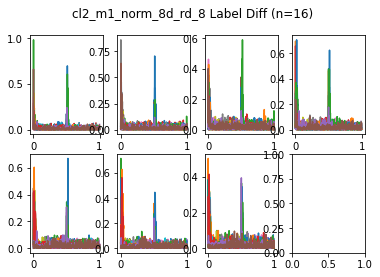

In [14]:
counter = 0

fig, axs = plt.subplots(2, num_drones //2)
axs = axs.flatten()

for i, folder in enumerate(sorted(os.listdir(eval_dir))[:]):
    try:
        d = 0
        labels0 = np.loadtxt(os.path.join(eval_dir, folder, f"labels{0}.csv"), delimiter=",")
        d += 1
        while d < num_drones:
            labels1 = np.loadtxt(os.path.join(eval_dir, folder, f"labels{d}.csv"), delimiter=",")
            labels = np.mean(np.abs(labels0 - labels1), axis=1)
            axs[d-1].plot(np.linspace(0, 1, labels.shape[0]), labels)
            labels0 = labels1
            d+=1
        counter += 1
    except:
        pass
# axs[0].set_title("Leader Drone")
# axs[1].set_title("Follower Drone")
# axs[0].axhspan(-1, 1, facecolor='grey', alpha=0.2)
# axs[0].axhspan(-1, 1, facecolor='grey', alpha=0.2)
fig.suptitle(f"{eval_dir} Label Diff (n={counter})")

[0.42486564 0.23162165 0.24165647 0.36194866 0.31848872 0.14721425
 0.69292482 0.4007826  0.27557427 0.33817279 0.29392133 0.28737948
 0.16148369 0.33962306 0.46238258 0.37201532]


Text(0.5, 1.0, 'cl2_m2_8 Dist (MAE=0.334) (lastMAE=0.320) (n=16)')

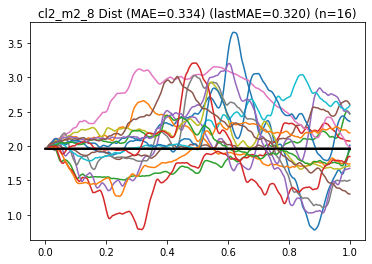

In [9]:
mean_dist = []
last_dist = []
counter = 0
target_dist = 2 * 1.0 * np.sin(np.pi * 0.875 / 2)
for i, folder in enumerate(sorted(os.listdir(eval_dir))[:]):
    try:
        dist = np.loadtxt(os.path.join(eval_dir, folder, f"dist.csv"), delimiter=",")
        plt.plot(np.linspace(0, 1, dist.shape[0]), dist)
        plt.plot(np.linspace(0, 1, dist.shape[0]), np.ones(dist.shape[0]) * target_dist, color="black")
        mean_dist.append(np.mean(np.abs(dist - target_dist)))
        last_dist.append(np.mean(np.abs(dist[-1] - target_dist)))
        counter += 1
    except:
        pass
mean_dist = np.array(mean_dist)
last_dist = np.array(last_dist)
print(mean_dist)
plt.title(f"{eval_dir} Dist (MAE={np.mean(np.abs(mean_dist)):.03f}) (lastMAE={np.mean(np.abs(last_dist)):.03f}) (n={counter})")
# plt.axvspan(0.5, 1.0, facecolor='grey', alpha=0.2)
# plt.axhspan(0.4, 0.6, facecolor='grey', alpha=0.2)

In [6]:
from PIL import Image, ImageDraw, ImageFont

rows = 2
cols = 3
images = []
labels = []
for i, folder in enumerate(os.listdir(eval_dir)[:16]):
    try:
        path = plt.imread(os.path.join(eval_dir, folder, "path.jpg"))
        images.append(Image.fromarray(path))
        # read csv
        #directions = np.loadtxt(os.path.join(eval_dir, folder, "labels.csv"), delimiter=",")
        #label = "counter-clockwise" if directions[0] == 1 else "clockwise"
        #label += f'=> {"counter-clockwise" if directions[-1] == 1 else "clockwise"}'
        #labels.append(label)
        labels.append("")
    except:
        labels.append("")
        pass

title = eval_dir
image_width, image_height = images[0].size
output_image = Image.new('RGB', (image_width * cols, image_height * rows + 10), color=(255, 255, 255))

draw = ImageDraw.Draw(output_image)
font = ImageFont.truetype("/usr/share/fonts/truetype/lato/Lato-Medium.ttf", size=20)

positions = [(x, y) for x in range(0, image_width * cols, image_width) for y in range(0, image_height * rows, image_height)]

# Paste each image into the correct position
for img, pos, label in zip(images, positions, labels):
    output_image.paste(img, pos)
    draw.text((pos[0]+10, pos[1]+10), label, fill="red", font=font)
draw.text((10, image_height * rows - 10), title, fill="red", font=font)

# output_image.save('output.jpg')
output_image = output_image.resize((image_width * cols//2, image_height * rows//2))
display(output_image)

In [3]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for i, folder in enumerate(os.listdir(eval_dir)[-16:]):
    try:
        path = plt.imread(os.path.join(eval_dir, folder, "path.jpg"))
        axs[i//4, i%4].imshow(path)
        
        # axs[i//4, i%4].set_title(folder)
    except:
        pass

NameError: name 'plt' is not defined

In [122]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for i, folder in enumerate(os.listdir(train_dir)[-16:]):
    try:
        path = plt.imread(os.path.join(train_dir, folder, "path.jpg"))
        axs[i//4, i%4].imshow(path)
        axs[i//4, i%4].set_title(folder)
    except:
        pass

### vision

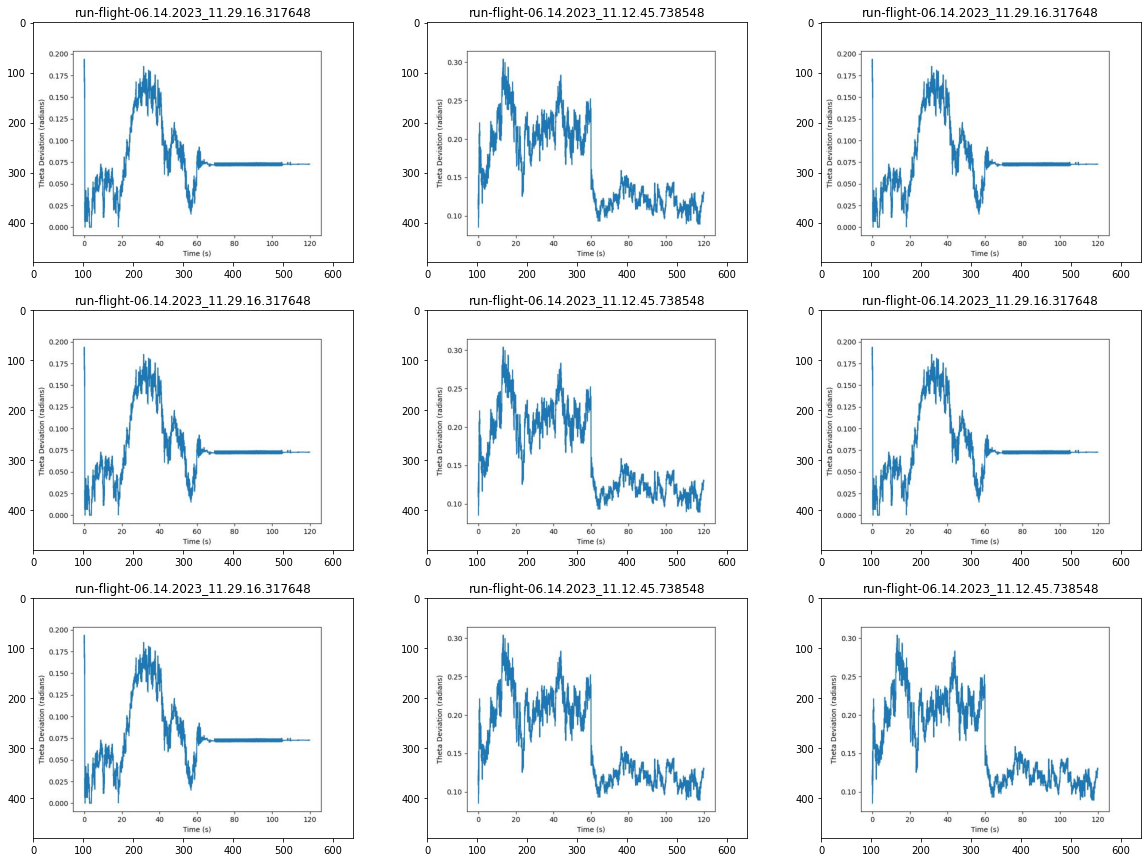

In [29]:
eval_dir = f"cl_v9_aug_split_v2"
# Dense(30, relu) => Dense (2) [radius, theta_offset]
# make a 9 plot diagram of path.jpg in 9 random folders, without replacement, in eval_dir:
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
for i, folder in enumerate(np.random.choice(os.listdir(eval_dir), 9)):
    try:
        path = plt.imread(os.path.join(eval_dir, folder, "radius.jpg"))
        axs[i//3, i%3].imshow(path)
        axs[i//3, i%3].set_title(folder)
    except:
        pass
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
for i, folder in enumerate(np.random.choice(os.listdir(eval_dir), 9)):
    try:
        path = plt.imread(os.path.join(eval_dir, folder, "theta.jpg"))
        axs[i//3, i%3].imshow(path)
        axs[i//3, i%3].set_title(folder)
    except:
        pass

## Videos

In [1]:
version = "v13"
eval_dir = f"cl2_{version}"

from PIL import Image, ImageDraw, ImageFont
import numpy as np
label_pics = True
absolute_paths = []
for run in sorted(os.listdir(eval_dir)[:]):
    absolute_path = os.path.join(eval_dir, run)
    print(absolute_path)
    try:
        if "rand.mp4" not in os.listdir(absolute_path):
            if label_pics:
                labels = np.loadtxt(os.path.join(absolute_path, "labels.csv"), delimiter=",")
                os.mkdir(os.path.join(absolute_path, "labeled_pics"))
                for i, (img_path, label) in enumerate(zip(sorted(os.listdir(os.path.join(absolute_path, "pics"))), labels)):
                    img = Image.open(os.path.join(absolute_path, "pics", img_path))
                    width, height = img.size
                    
                    draw = ImageDraw.Draw(img)
                    font = ImageFont.truetype("/usr/share/fonts/truetype/lato/Lato-Medium.ttf", size=20)
                    draw.text((10, 10), "ccw" if label == 1 else "cw", fill="red", font=font)
                    if i < 8:
                        draw.text((width - 60, 10), "begin", fill="red", font=font)

                    img.save(os.path.join(absolute_path, "labeled_pics", img_path))

                os.system(f"ffmpeg -framerate 240 -pattern_type glob -i '{absolute_path}/labeled_pics/0*.png' -c:v libx264 -pix_fmt yuv420p {absolute_path}/rand.mp4 > /dev/null 2>&1")
                os.system(f"rm -rf {absolute_path}/labeled_pics")
            else:
                os.system(f"ffmpeg -framerate 240 -pattern_type glob -i '{absolute_path}/pics/0*.png' -c:v libx264 -pix_fmt yuv420p {absolute_path}/rand.mp4 > /dev/null 2>&1")
    except:
        continue

    absolute_paths.append(absolute_path)

NameError: name 'os' is not defined

In [6]:
version = "ff1_8"
eval_dir = f"cl_{version}"
num_drones = 2
rows = 1
cols = 2

from PIL import Image, ImageDraw, ImageFont
import numpy as np
label_pics = True
absolute_paths = []
for run in sorted(os.listdir(eval_dir)[:]):
    absolute_path = os.path.join(eval_dir, run)
    print(absolute_path)
    try:
        if "rand.mp4" not in os.listdir(absolute_path):
            # os.system(f"rm {absolute_path}/rand.mp4")
            os.mkdir(os.path.join(absolute_path, "labeled_pics"))
            # labels = np.loadtxt(os.path.join(absolute_path, "labels0.csv"), delimiter=",")
            
            imgs = [[] for _ in range(num_drones)]
            # for i, (img_path0, label) in enumerate(zip(sorted(os.listdir(os.path.join(absolute_path, "pics0"))), labels)):
            for i, (img_path0) in enumerate(sorted(os.listdir(os.path.join(absolute_path, "pics0")))):
                for d in range(num_drones):
                    imgs[d] = Image.open(os.path.join(absolute_path, f"pics{d}", img_path0))
                width, height = imgs[0].size
                output_image = Image.new('RGB', (width * cols, height * rows), color=(255, 255, 255))

                draw = ImageDraw.Draw(output_image)
                font = ImageFont.truetype("/usr/share/fonts/truetype/lato/Lato-Medium.ttf", size=20)

                positions = [(x, y) for x in range(0, width * cols, width) for y in range(0, height * rows, height)]
                for d, pos in zip(range(num_drones), positions):
                    output_image.paste(imgs[d], pos)

                # draw.text((10, 10), "ccw" if np.all(labels[i][:2] == [1, 0]) else "cw", fill="red", font=font)
                if i < 30:
                    draw.text((num_drones * width - 60, 10), "begin", fill="red", font=font)

                output_image.save(os.path.join(absolute_path, "labeled_pics", img_path0))

            os.system(f"ffmpeg -framerate 240 -pattern_type glob -i '{absolute_path}/labeled_pics/0*.png' -c:v libx264 -pix_fmt yuv420p {absolute_path}/rand.mp4 > /dev/null 2>&1")
            os.system(f"rm -rf {absolute_path}/labeled_pics")
    except Exception as e:
        print(e)
        os.system(f"rm -rf {absolute_path}/labeled_pics")

    absolute_paths.append(absolute_path)

train_ff1_8/save-flight-07.19.2023_01.26.22.160037


In [7]:
version = "ff1_delay_8"
eval_dir = f"train_{version}"
num_drones = 2
rows = 1
cols = 2

from PIL import Image, ImageDraw, ImageFont
import numpy as np
label_pics = True
custom_runs = ["save-flight-07.19.2023_12.01.52.042255"]
absolute_paths = []
for run in sorted(custom_runs):
    absolute_path = os.path.join(eval_dir, run)
    print(absolute_path)
    try:
        if "rand.mp4" not in os.listdir(absolute_path):
            # os.system(f"rm {absolute_path}/rand.mp4")
            os.mkdir(os.path.join(absolute_path, "labeled_pics"))
            # labels = np.loadtxt(os.path.join(absolute_path, "labels0.csv"), delimiter=",")
            
            imgs = [[] for _ in range(num_drones)]
            # for i, (img_path0, label) in enumerate(zip(sorted(os.listdir(os.path.join(absolute_path, "pics0"))), labels)):
            for i, (img_path0) in enumerate(sorted(os.listdir(os.path.join(absolute_path, "pics0")))):
                for d in range(num_drones):
                    if d==0:
                        imgs[d] = Image.open(os.path.join(absolute_path, f"pics", img_path0))
                    else:
                        imgs[d] = Image.open(os.path.join(absolute_path, f"pics{d}", img_path0))
                width, height = imgs[0].size
                output_image = Image.new('RGB', (width * cols, height * rows), color=(255, 255, 255))

                draw = ImageDraw.Draw(output_image)
                font = ImageFont.truetype("/usr/share/fonts/truetype/lato/Lato-Medium.ttf", size=20)

                positions = [(x, y) for x in range(0, width * cols, width) for y in range(0, height * rows, height)]
                for d, pos in zip(range(num_drones), positions):
                    output_image.paste(imgs[d], pos)

                # draw.text((10, 10), "ccw" if np.all(labels[i][:2] == [1, 0]) else "cw", fill="red", font=font)
                if i < 30:
                    draw.text((num_drones * width - 60, 10), "begin", fill="red", font=font)

                output_image.save(os.path.join(absolute_path, "labeled_pics", img_path0))

            os.system(f"ffmpeg -framerate 240 -pattern_type glob -i '{absolute_path}/labeled_pics/0*.png' -c:v libx264 -pix_fmt yuv420p {absolute_path}/rand.mp4 > /dev/null 2>&1")
            os.system(f"rm -rf {absolute_path}/labeled_pics")
    except Exception as e:
        print(e)
        os.system(f"rm -rf {absolute_path}/labeled_pics")

    absolute_paths.append(absolute_path)

train_ff1_delay_8/save-flight-07.19.2023_12.01.52.042255
[Errno 2] No such file or directory: 'train_ff1_delay_8/save-flight-07.19.2023_12.01.52.042255/pics0'


In [181]:
index = 0
video_paths = [absolute_path for absolute_path in sorted(os.listdir(eval_dir)) if "rand.mp4" in os.listdir(os.path.join(eval_dir, absolute_path))]

In [191]:
index += 1

In [20]:
# play mp4 video in jupyter notebook:
from IPython.display import Video
print(f"{eval_dir}/{video_paths[index]}")
Video(os.path.join(eval_dir, video_paths[index], "rand.mp4"), width=640, height=480, html_attributes="controls autoplay playbackRate=2")

NameError: name 'index' is not defined

In [19]:
import subprocess

video_paths = [os.path.join(eval_dir, absolute_path, "rand.mp4") for absolute_path in sorted(os.listdir(eval_dir)) if "rand.mp4" in os.listdir(os.path.join(eval_dir, absolute_path))]
# concatenate all videos in video_paths
with open("input.txt", "w") as f:
    for video_path in video_paths:
        f.write(f"file {video_path}\n")

subprocess.run(["ffmpeg", "-f", "concat", "-safe", "0", "-i", "input.txt", "-c", "copy", f"{eval_dir}/combined_video.mp4"])


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

CompletedProcess(args=['ffmpeg', '-f', 'concat', '-safe', '0', '-i', 'input.txt', '-c', 'copy', 'cl_f3_fix_norm_2rnn_8/combined_video.mp4'], returncode=0)

In [77]:
arctan = np.arctan2(1, np.sqrt(3))
arctan

# in degrees
np.rad2deg(arctan)

30.000000000000004

In [78]:
-3 % np.pi

0.14159265358979312

In [81]:
np.log([0.1, 0.2, 1, 2, 3])

array([-2.30258509, -1.60943791,  0.        ,  0.69314718,  1.09861229])

## Normalization on clean data

In [5]:
import pandas as pd
root_dir = "/home/makramchahine/repos/drone_multimodal/clean_train_ff1_norm_8"
df_total = pd.DataFrame()
for i, run in enumerate(sorted(os.listdir(root_dir))):
    if not os.path.isdir(os.path.join(root_dir, run)):
        continue
    if i % 100 == 0:
        print(i)

    csv_path = os.path.join(root_dir, run, "data_out_base.csv")
    df = pd.read_csv(csv_path)
    print(df.shape)
    if df.shape[0]== 1:
        print(run)
    df_total = pd.concat([df_total, df], axis=0, ignore_index=True)

df_norm = pd.DataFrame([df_total.mean(), df_total.std()], index=["mean", "std"])
df_norm.to_csv(os.path.join(root_dir, "mean_std.csv"))

df_mean = df_norm.iloc[0]
df_std = df_norm.iloc[1]

for i, run in enumerate(sorted(os.listdir(root_dir))):
    if not os.path.isdir(os.path.join(root_dir, run)):
        continue
    if i % 100 == 0:
        print(i)

    csv_path = os.path.join(root_dir, run, "data_out_base.csv")
    df = pd.read_csv(csv_path)
    df_new = (df - df_mean) / df_std
    df_new.to_csv(os.path.join(root_dir, run, "data_out.csv"), index=False)


(131, 8)
(179, 8)
(127, 8)
(110, 8)
(142, 8)
(74, 8)
(102, 8)
(160, 8)
(107, 8)
(38, 8)
(101, 8)
(142, 8)
(36, 8)
(161, 8)
(44, 8)
(175, 8)
(89, 8)
(146, 8)
(104, 8)
(97, 8)
(285, 8)
(139, 8)
(224, 8)
(270, 8)
(74, 8)
(181, 8)
(181, 8)
(263, 8)
(119, 8)
(134, 8)
(165, 8)
(159, 8)
(158, 8)
(185, 8)
(157, 8)
(177, 8)
(147, 8)
(163, 8)
(70, 8)
(19, 8)
(156, 8)
(162, 8)
(159, 8)
(130, 8)
(176, 8)
(157, 8)
(1, 8)
save-flight-07.19.2023_01.27.53.373908
(121, 8)
(170, 8)
(127, 8)
(142, 8)
(22, 8)
(133, 8)
(154, 8)
(144, 8)
(75, 8)
(88, 8)
(166, 8)
(254, 8)
(155, 8)
(144, 8)
(135, 8)
(176, 8)
(209, 8)
(84, 8)
(103, 8)
(169, 8)
(80, 8)
(108, 8)
(129, 8)
(116, 8)
(75, 8)
(208, 8)
(212, 8)
(256, 8)
(145, 8)
(99, 8)
(118, 8)
(106, 8)
(62, 8)
(119, 8)
(132, 8)
(45, 8)
(147, 8)
(154, 8)
(125, 8)
(158, 8)
(72, 8)
(157, 8)
(23, 8)
(96, 8)
(230, 8)
(272, 8)
(247, 8)
(171, 8)
(50, 8)
(136, 8)
(116, 8)
(94, 8)
100
(89, 8)
(103, 8)
(92, 8)
(58, 8)
(39, 8)
(180, 8)
(88, 8)
(36, 8)
(134, 8)
(111, 8)
(42, 8)

In [10]:
df_norm = pd.read_csv(os.path.join(root_dir, "mean_std.csv"), index_col=0)


In [14]:
df_test = pd.read_csv("/home/makramchahine/repos/drone_multimodal/clean_train_f3_fix_norm_8/save-flight-07.18.2023_13.53.03.775032/data_out.csv")
df_test

Unnamed: 0        vx        vy        vz   omega_z      vx.1      vy.1  \
0             0  1.761517  3.701831  7.626699  1.469902  1.761517  3.701831   
1             1  1.819373  3.706557  5.252086  1.469913  1.819373  3.706557   
2             2  1.893419  3.733320  3.519671  1.470022  1.893419  3.733320   
3             3  1.959159  3.740110  2.329569  1.470092  1.959159  3.740110   
4             4  2.002628  3.706405  1.556080  1.470089  2.002628  3.706405   
..          ...       ...       ...       ...       ...       ...       ...   
120         120 -0.577563 -0.045550 -0.225903 -0.025012 -0.577563 -0.045550   
121         121 -0.577099 -0.045550 -0.225779 -0.025012 -0.577099 -0.045550   
122         122 -0.586102 -0.045543 -0.216782 -0.025012 -0.586102 -0.045543   
123         123 -0.617458 -0.045512 -0.207836 -0.025012 -0.617458 -0.045512   
124         124 -0.663923 -0.045455 -0.226545 -0.025012 -0.663923 -0.045455   

         vz.1  omega_z.1  
0    7.626699   1.469902  
1    5.252086   1.469913  
2    3.519671   1.470022  
3    2.329569   1.470092  
4    1.556080   1.470089  
..        ...        ...  
120 -0.225903  -0.025012  
121 -0.225779  -0.025012  
122 -0.216782  -0.025012  
123 -0.207836  -0.025012  
124 -0.226545  -0.025012  

[125 rows x 9 columns]

In [11]:
df_mean = df_norm.iloc[0].to_numpy()
df_std = df_norm.iloc[1].to_numpy()


In [13]:
df_norm

vx        vy        vz   omega_z      vx.1      vy.1      vz.1  \
mean  0.038513  0.000783  0.000007  0.001282  0.038513  0.000783  0.000007   
std   0.052487  0.017263  0.000034  0.051386  0.052487  0.017263  0.000034   

      omega_z.1  
mean   0.001282  
std    0.051386

In [ ]:
a = np.zeros((100, 6))
df_new = a * df_std + df_mean
df_new

## Plot Velocity Outputs

In [3]:
def plot_comparison(true_csv, pred_csv, title):
    # extract columns from vel_csv and plot each
    vel_pred = np.loadtxt(pred_csv, delimiter=",", skiprows=1)
    vel_true = np.loadtxt(true_csv, delimiter=",", skiprows=1)
    # plt subfigure with 2 rows and 1 column
    fig, axs = plt.subplots(2, 2, figsize=(7.5, 5))
    axs = axs.flatten()

    axs[0].plot(vel_true[:, 0], label="vx_true")
    axs[0].plot(vel_pred[:, 0], label="vx_pred")

    axs[1].plot(vel_true[:, 1], label="vy_true")
    axs[1].plot(vel_pred[:, 1], label="vy_pred")

    axs[2].plot(vel_true[:, 2], label="vz_true")
    axs[2].plot(vel_pred[:, 2], label="vz_pred")

    axs[3].plot(vel_true[:, 3], label="omega_z_true")
    axs[3].plot(vel_pred[:, 3], label="omega_z_pred")

    fig.suptitle(f"Train/Replay Velocity {title}")
    axs[3].set_xlabel("frame")

    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    axs[3].legend()
    fig.show()

    loss = np.mean((vel_true - vel_pred)**2, axis=0)
    print(loss)
    print(np.sum(loss))


In [98]:
def plot_comparison_multi(csvs, labels, title, fig_dims=(2, 2), fig_size=(7.5, 5), normalize_x=False, alpha=1):
    fig, axs = plt.subplots(*fig_dims, figsize=fig_size)
    axs = axs.flatten()

    for csv, label in zip(csvs, labels):
        vels = np.loadtxt(csv, delimiter=",", skiprows=1)
        time = np.arange(vels.shape[0])
        if normalize_x:
            time = time / vels.shape[0]

        axs[0].plot(time, vels[:, 0], label=f"vx_{label}", alpha=alpha)
        axs[1].plot(time, vels[:, 1], label=f"vy_{label}", alpha=alpha)
        axs[2].plot(time, vels[:, 2], label=f"vz_{label}", alpha=alpha)
        axs[3].plot(time, vels[:, 3], label=f"omega_z_{label}", alpha=alpha)
        
    for ax in axs:
        ax.legend()
        # draw horizontal line at 0
        ax.axhline(0, color="black", linestyle="--", linewidth=0.5)
    fig.suptitle(f"{title}")
    axs[-1].set_xlabel("frame")
    fig.show()

### v11

[5.92905756e-07 8.70163708e-06 1.39909849e-06 3.23710579e-06]
1.3930747115624506e-05


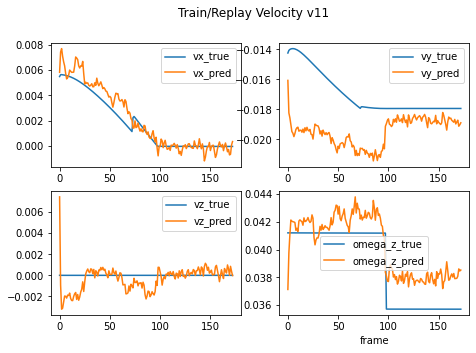

In [ ]:
true_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11/save-flight-06.14.2023_11.16.35.532550/data_out.csv"
pred_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11/vel_cmd.csv"

plot_comparison(true_csv, pred_csv, "v11")

### v11 early

[3.93185985e-06 3.36637054e-05 1.51517743e-06 4.08561997e-04]
0.00044767273920098827


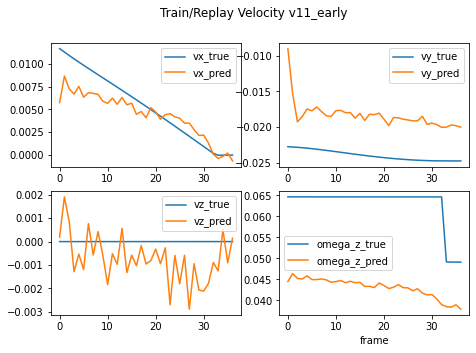

In [ ]:
model = "v11_early"
true_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_early/save-flight-06.19.2023_11.06.38.493638/data_out.csv"
pred_csv = f"/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_{model}/vel_cmd.csv"

plot_comparison(true_csv, pred_csv, model)

### v11 fast

[5.41371971e-04 1.59017611e-04 3.78152573e-05 1.05862678e-03]
0.0017968316139997248


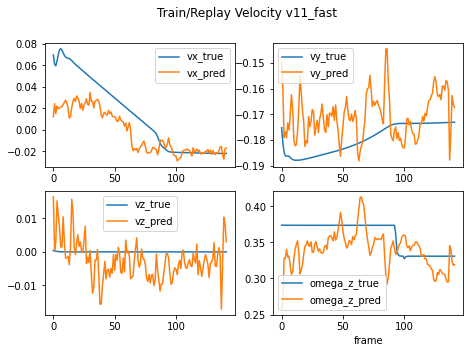

In [123]:
model = "v11_fast"
true_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_fast/save-flight-06.22.2023_11.43.22.402338/data_out.csv"
pred_csv = f"/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_{model}/vel_cmd.csv"

plot_comparison(true_csv, pred_csv, model)

### v11 fast init

[1.21419111e-04 8.03235065e-04 6.21864321e-05 1.14894116e-03]
0.0021357817710649404


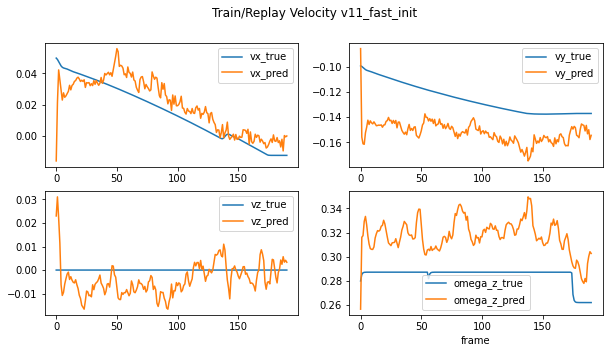

In [ ]:
model = "v11_fast_init"
true_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_fast_init/save-flight-06.22.2023_16.05.57.787631/data_out.csv"
pred_csv = f"/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_{model}/vel_cmd.csv"

plot_comparison(true_csv, pred_csv, model)

### v11 fast init pp

[0.00013214 0.00010115 0.00012639 0.00046516]
0.0008248468411014532


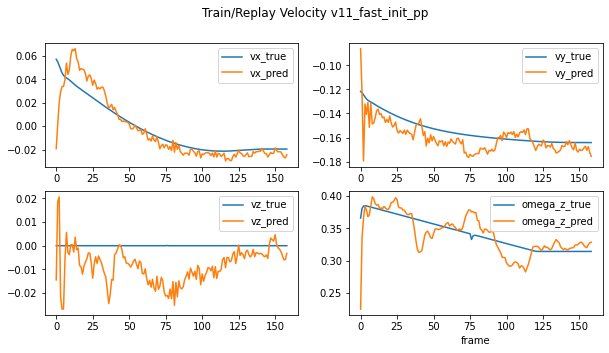

In [ ]:
model = "v11_fast_init_pp"
true_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_fast_init_pp/save-flight-06.22.2023_16.37.04.959115/data_out.csv"
pred_csv = f"/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_{model}/vel_cmd.csv"

plot_comparison(true_csv, pred_csv, model)

### v11 fast init pp big

[6.80062505e-06 1.07947573e-05 1.27799255e-06 6.15770424e-05]
8.045041726768123e-05


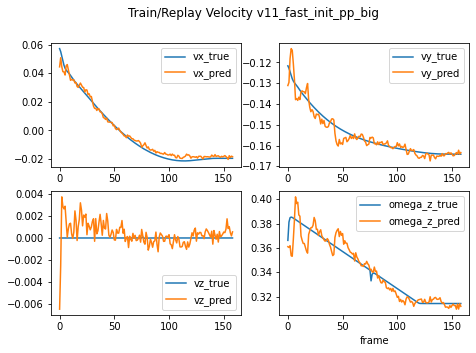

In [112]:
model = "v11_fast_init_pp_big"
true_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_fast_init_pp/save-flight-06.22.2023_16.37.04.959115/data_out.csv"
pred_csv = f"/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_{model}/vel_cmd.csv"

plot_comparison(true_csv, pred_csv, model)

### v11 debug (generated w v11 fast init pp big)

[4.85243851e-06 2.28210195e-05 6.70536362e-07 1.19460595e-04]
0.00014780458914536294


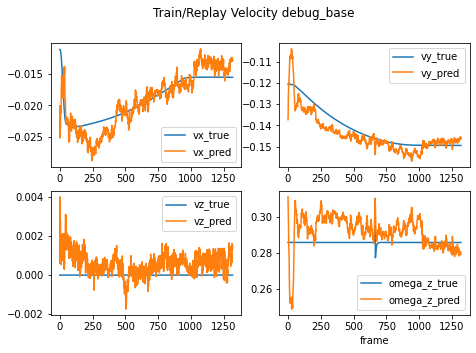

In [5]:
model = "debug_base"
true_csv = "/home/makramchahine/repos/drone_multimodal/clean_replay_debug_base/save-flight-06.27.2023_15.07.06.384563/data_out.csv"
pred_csv = f"/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_{model}/vel_cmd.csv"

plot_comparison(true_csv, pred_csv, model)

### v12

[1.05927849e-05 2.36335723e-06 3.81994457e-07 7.73571341e-06]
2.107384995856343e-05


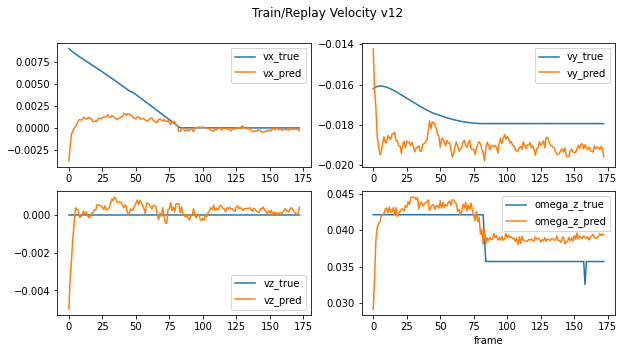

In [73]:
model = "v12"
true_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v12/save-flight-06.15.2023_00.32.59.125812/data_out.csv"
pred_csv = f"/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_{model}/vel_cmd.csv"

plot_comparison(true_csv, pred_csv, model)

### v11 fpp Early

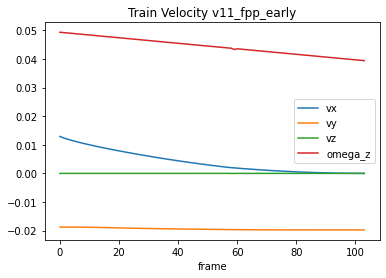

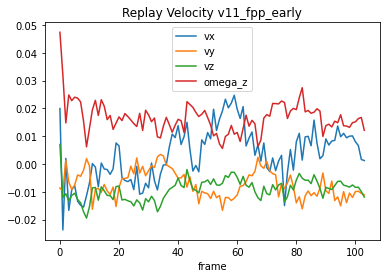

In [22]:
import numpy as np
import matplotlib.pyplot as plt

vel_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_fpp_early/save-flight-06.17.2023_09.27.50.397513/data_out.csv"
# extract columns from vel_csv and plot each
vel_true = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_true[:, 0], label="vx")
plt.plot(vel_true[:, 1], label="vy")
plt.plot(vel_true[:, 2], label="vz")
plt.plot(vel_true[:, 3], label="omega_z")
plt.title("Train Velocity v11_fpp_early")
plt.xlabel("frame")
plt.legend()
plt.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11_fpp_early/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity v11_fpp_early")
plt.xlabel("frame")

plt.legend()

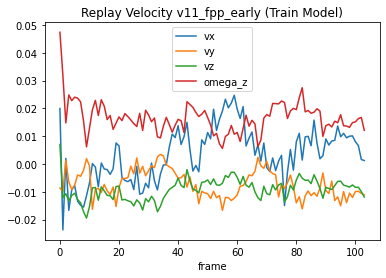

In [18]:
vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11_fpp_early/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity v11_fpp_early (Train Model)")
plt.xlabel("frame")

plt.legend()

In [15]:
# loss is MSE of vel_true and vel_pred
loss = np.mean((vel_true - vel_pred)**2, axis=0)
print(loss)
print(np.sum(loss))

[0.00352728 0.00087162 0.00127904 0.00133856]
0.0070164939169050245


In [19]:
# loss is MSE of vel_true and vel_pred
loss = np.mean((vel_true - vel_pred)**2, axis=0)
print(loss)
print(np.sum(loss))

[1.50289377e-04 1.73438643e-04 9.90282225e-05 8.03179127e-04]
0.0012259353695778146


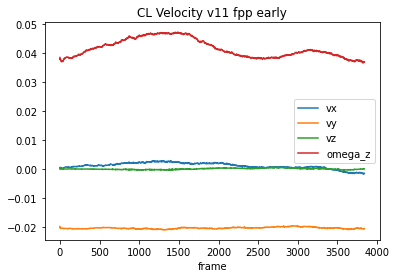

In [37]:
vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/cl2_v11_fpp_early_800/run-flight-06.22.2023_10.24.09.538220/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel[:, 0], label="vx")
plt.plot(vel[:, 1], label="vy")
plt.plot(vel[:, 2], label="vz")
plt.plot(vel[:, 3], label="omega_z")
plt.title("CL Velocity v11 fpp early")
plt.xlabel("frame")

plt.legend()

### v11 fpp early 400 epochs

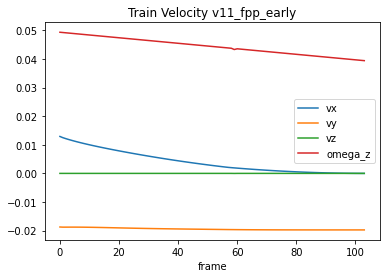

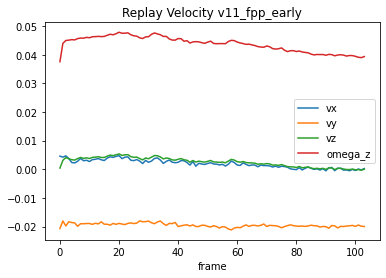

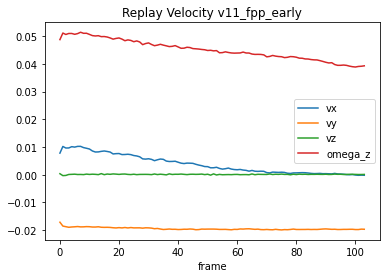

In [19]:
import numpy as np
import matplotlib.pyplot as plt

vel_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_fpp_early/save-flight-06.17.2023_09.27.50.397513/data_out.csv"
# extract columns from vel_csv and plot each
vel_true = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_true[:, 0], label="vx")
plt.plot(vel_true[:, 1], label="vy")
plt.plot(vel_true[:, 2], label="vz")
plt.plot(vel_true[:, 3], label="omega_z")
plt.title("Train Velocity v11_fpp_early")
plt.xlabel("frame")
plt.legend()
plt.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11_fpp_early/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity v11_fpp_early")
plt.xlabel("frame")

plt.legend()
plt.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11_fpp_early_800/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity v11_fpp_early_800")
plt.xlabel("frame")

plt.legend()

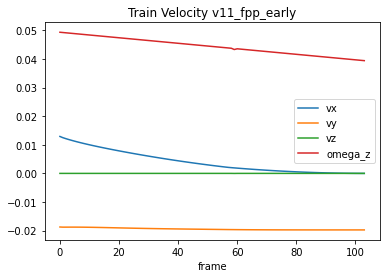

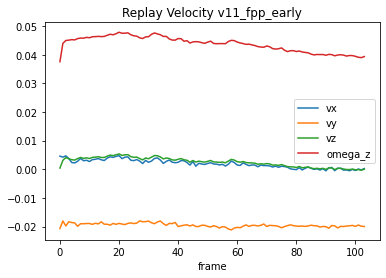

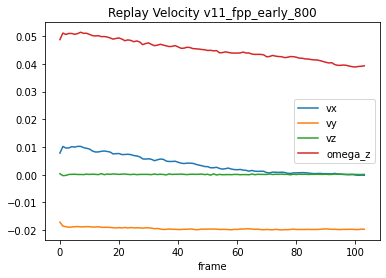

In [35]:
import numpy as np
import matplotlib.pyplot as plt

vel_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_fpp_early/save-flight-06.17.2023_09.27.50.397513/data_out.csv"
# extract columns from vel_csv and plot each
vel_true = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_true[:, 0], label="vx")
plt.plot(vel_true[:, 1], label="vy")
plt.plot(vel_true[:, 2], label="vz")
plt.plot(vel_true[:, 3], label="omega_z")
plt.title("Train Velocity v11_fpp_early")
plt.xlabel("frame")
plt.legend()
plt.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11_fpp_early/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity v11_fpp_early")
plt.xlabel("frame")

plt.legend()
plt.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11_fpp_early_800/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity v11_fpp_early_800")
plt.xlabel("frame")

plt.legend()

In [24]:
# loss is MSE of vel_true and vel_pred
loss = np.mean((vel_true - vel_pred)**2, axis=0)
print(loss)
print(np.sum(loss))

[4.78764593e-04 3.16799166e-04 6.79443859e-05 1.64902178e-03]
0.0025125299292891685


In [22]:
# loss is MSE of vel_true and vel_pred
loss = np.mean((vel_true - vel_pred)**2, axis=0)
print(loss)
print(np.sum(loss))

[0.00065287 0.00013736 0.00594542 0.00907686]
0.015812506002447012


### Train base

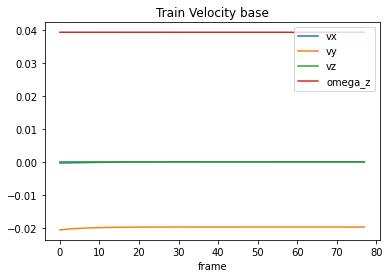

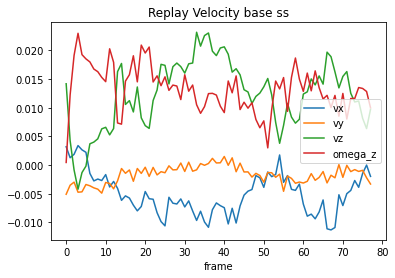

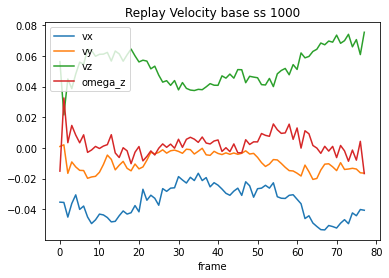

In [10]:
import numpy as np
import matplotlib.pyplot as plt

vel_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_base/save-flight-06.21.2023_07.29.13.667912/data_out.csv"
# extract columns from vel_csv and plot each
vel_true = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_true[:, 0], label="vx")
plt.plot(vel_true[:, 1], label="vy")
plt.plot(vel_true[:, 2], label="vz")
plt.plot(vel_true[:, 3], label="omega_z")
plt.title("Train Velocity base")
plt.xlabel("frame")
plt.legend()
plt.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11_fpp_early_400/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity base")
plt.xlabel("frame")

plt.legend()
plt.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_base_ss/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity base ss")
plt.xlabel("frame")

plt.legend()
plt.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_base_ss_1000/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity base ss 1000")
plt.xlabel("frame")

plt.legend()

In [21]:
# loss is MSE of vel_true and vel_pred
loss = np.mean((vel_true - vel_pred)**2, axis=0)
print(loss)
print(np.sum(loss))

[3.86928701e-05 3.30543493e-04 1.86689911e-04 6.95840880e-04]
0.0012517671539779415


In [11]:
# loss is MSE of vel_true and vel_pred
loss = np.mean((vel_true - vel_pred)**2, axis=0)
print(loss)
print(np.sum(loss))

[0.00134438 0.00014898 0.00292475 0.00142674]
0.005844852052616154


### Train v11 early ss

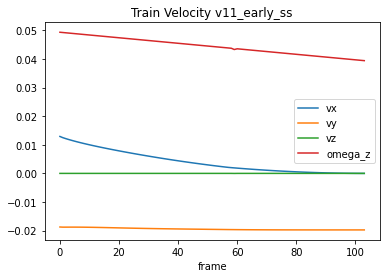

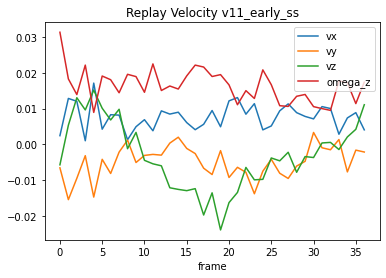

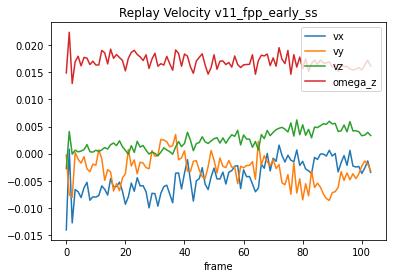

In [18]:
import numpy as np
import matplotlib.pyplot as plt

vel_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_early/save-flight-06.19.2023_11.06.38.493638/data_out.csv"
vel_csv = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_fpp_early/save-flight-06.17.2023_09.27.50.397513/data_out.csv"
# extract columns from vel_csv and plot each
vel_true = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_true[:, 0], label="vx")
plt.plot(vel_true[:, 1], label="vy")
plt.plot(vel_true[:, 2], label="vz")
plt.plot(vel_true[:, 3], label="omega_z")
plt.title("Train Velocity v11_early_ss")
plt.xlabel("frame")
plt.legend()
plt.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11_early_ss/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity v11_early_ss")
plt.xlabel("frame")

plt.legend()
plt.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11_fpp_early_ss/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
plt.plot(vel_pred[:, 0], label="vx")
plt.plot(vel_pred[:, 1], label="vy")
plt.plot(vel_pred[:, 2], label="vz")
plt.plot(vel_pred[:, 3], label="omega_z")
plt.title("Replay Velocity v11_fpp_early_ss")
plt.xlabel("frame")

plt.legend()

In [19]:
# loss is MSE of vel_true and vel_pred
loss = np.mean((vel_true - vel_pred)**2, axis=0)
print(loss)
print(np.sum(loss))

[1.09274307e-04 2.79199418e-04 9.77432679e-06 7.57859490e-04]
0.0011561075422271568


### v11_fast_big

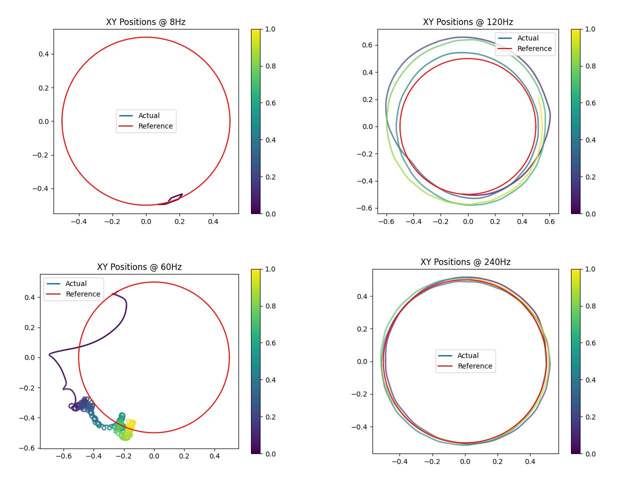

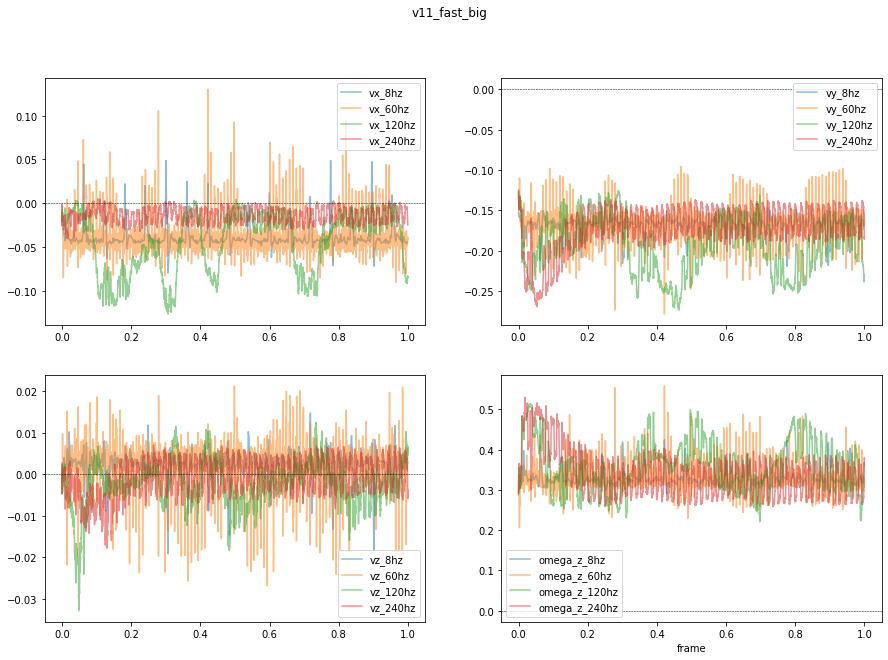

In [100]:
from PIL import Image, ImageDraw, ImageFont
csvs = [
    "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/cl2_v11_fast_big_8/run-flight-07.03.2023_10.22.54.276739/vel_cmd.csv",
    "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/cl2_v11_fast_big_60/run-flight-07.03.2023_10.25.33.059978/vel_cmd.csv",
    "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/cl2_v11_fast_big_120/run-flight-07.03.2023_10.03.24.460286/vel_cmd.csv",
    "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/cl2_v11_fast_big_240/run-flight-07.01.2023_17.09.26.000669/vel_cmd.csv"
]
labels = ["8hz", "60hz", "120hz", "240hz"]


plot_comparison_multi(csvs, labels, "v11_fast_big", fig_size=(15, 10), normalize_x=True, alpha=0.5)

rows = 2; cols = 2; images = []; labels = []
for csv in csvs:
    folder_path = os.path.dirname(csv)
    img = plt.imread(os.path.join(folder_path, "path.jpg"))
    images.append(Image.fromarray(img))
    labels.append("")

image_width, image_height = images[0].size
output_image = Image.new('RGB', (image_width * cols, image_height * rows))

# draw = ImageDraw.Draw(output_image)
# font = ImageFont.truetype("/usr/share/fonts/truetype/lato/Lato-Medium.ttf", size=20)

positions = [(x, y) for x in range(0, image_width * cols, image_width) for y in range(0, image_height * rows, image_height)]
# Paste each image into the correct position
for img, pos, label in zip(images, positions, labels):
    output_image.paste(img, pos)
    # draw.text((pos[0]+10, pos[1]+10), label, fill="red", font=font)

# output_image.save('output.jpg')
output_image = output_image.resize((image_width * cols//2, image_height * rows//2))
display(output_image)

### v13_fast_big

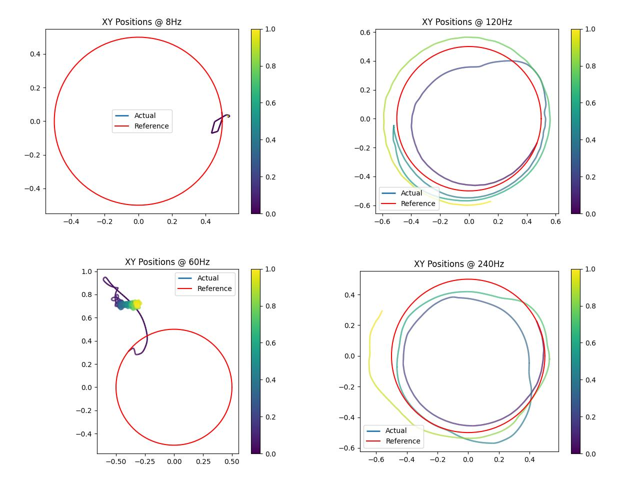

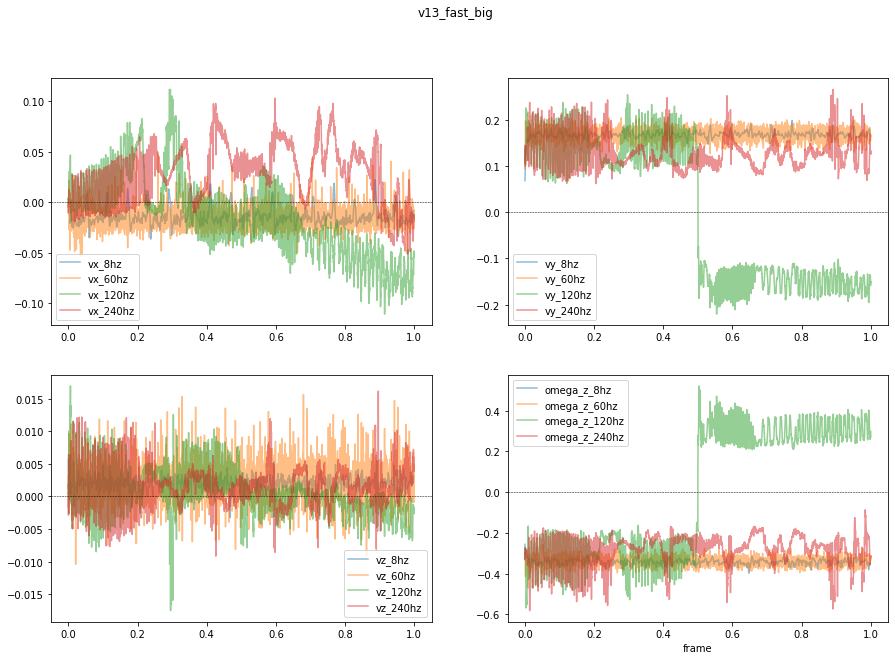

In [101]:
csvs = [
    "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/cl2_v13_fast_big_8/run-flight-07.05.2023_13.31.32.267543/vel_cmd.csv",
    "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/cl2_v13_fast_big_60/run-flight-07.05.2023_10.22.52.871353/vel_cmd.csv",
    "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/cl2_v13_fast_big_120/run-flight-07.03.2023_19.25.56.032708/vel_cmd.csv",
    "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/cl2_v13_fast_big_240/run-flight-07.03.2023_18.33.57.268243/vel_cmd.csv"
]
labels = ["8hz", "60hz", "120hz", "240hz"]


plot_comparison_multi(csvs, labels, "v13_fast_big", fig_size=(15, 10), normalize_x=True, alpha=0.5)

rows = 2; cols = 2; images = []; labels = []
for csv in csvs:
    folder_path = os.path.dirname(csv)
    img = plt.imread(os.path.join(folder_path, "path.jpg"))
    images.append(Image.fromarray(img))
    labels.append("")

image_width, image_height = images[0].size
output_image = Image.new('RGB', (image_width * cols, image_height * rows))

# draw = ImageDraw.Draw(output_image)
# font = ImageFont.truetype("/usr/share/fonts/truetype/lato/Lato-Medium.ttf", size=20)

positions = [(x, y) for x in range(0, image_width * cols, image_width) for y in range(0, image_height * rows, image_height)]
# Paste each image into the correct position
for img, pos, label in zip(images, positions, labels):
    output_image.paste(img, pos)
    # draw.text((pos[0]+10, pos[1]+10), label, fill="red", font=font)

# output_image.save('output.jpg')
output_image = output_image.resize((image_width * cols//2, image_height * rows//2))
display(output_image)

## Plot everything CL run

In [133]:
import math

def plot_everything(array, labels=None, fig_size=(15, 10), x_lim=None):
    num_plots = array.shape[1]
    fig, axs = plt.subplots(math.ceil(math.sqrt(num_plots)), math.ceil(math.sqrt(num_plots)), figsize=fig_size)
    axs = axs.flatten()
    for i in range(num_plots):
        if x_lim is None:
            x_lim = array.shape[0]
        axs[i].plot(array[:x_lim, i])
        if labels is not None:
            axs[i].set_title(labels[i])
        else:
            axs[i].set_title("axis {}".format(i))

# X        Y        Z       Q1   Q2   Q3   Q4   R       P       Y       VX       VY       VZ       WX       WY       WZ       P0            P1            P2            P3
STATE_TITLES = ["TIME", "X", "Y", "Z", "Q1", "Q2", "Q3", "Q4", "R", "P", "Y", "VX", "VY", "VZ", "WX", "WY", "WZ", "P0", "P1", "P2", "P3"]

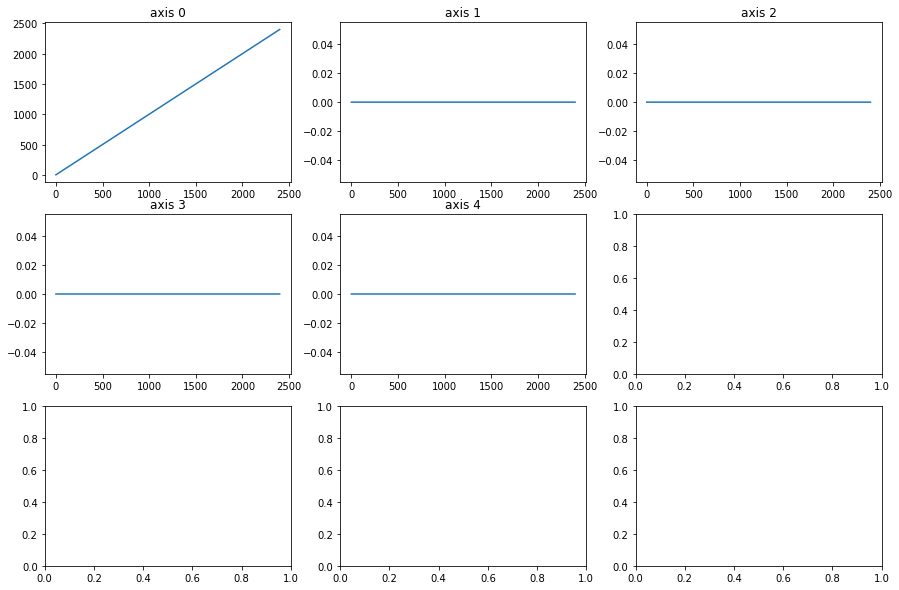

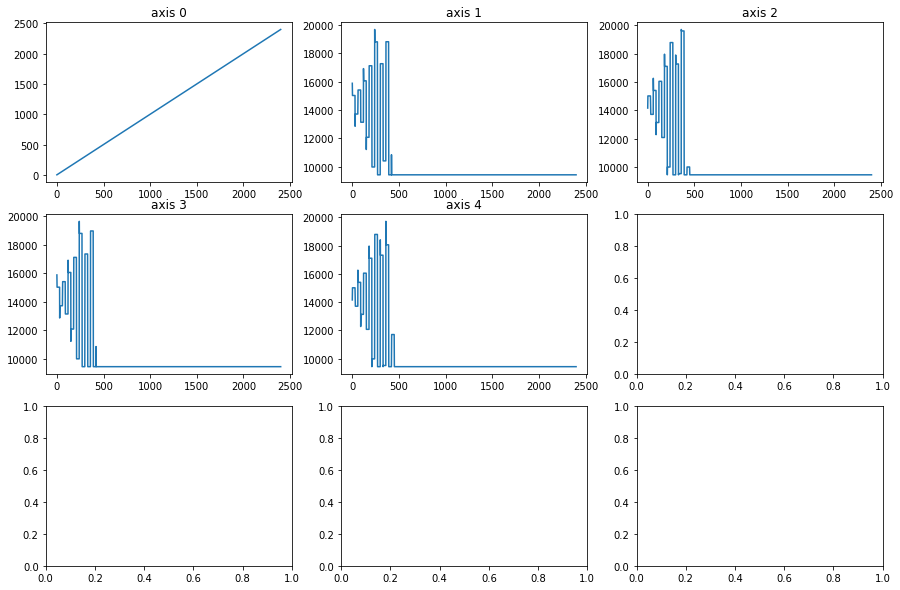

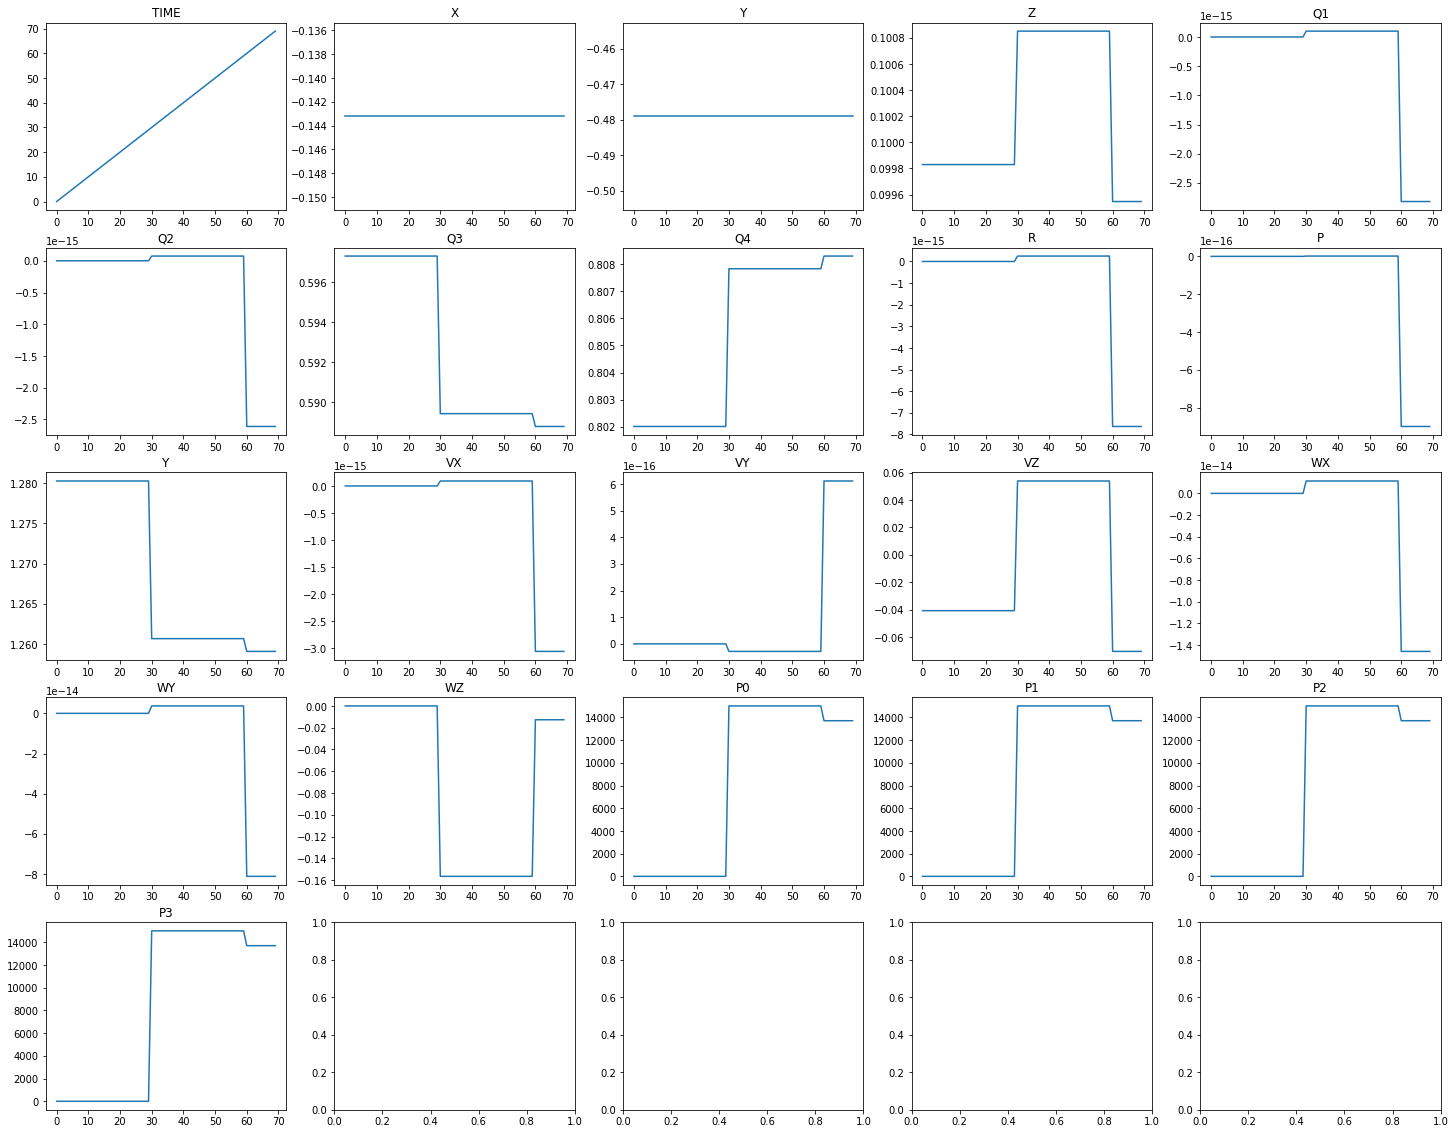

In [137]:
# folder = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/cl2_v13_fast_pp_big_still_8/run-flight-07.05.2023_18.20.31.349104"
folder = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/cl2_v13_fast_pp_big_still_8/run-flight-07.05.2023_18.16.52.121976"
vel_cmd_csv = os.path.join(folder, "vel_cmd.csv")
action_csv = os.path.join(folder, "action.csv")
state_csv = os.path.join(folder, "state.csv")

vel_cmd = np.loadtxt(vel_cmd_csv, delimiter=",")
action = np.loadtxt(action_csv, delimiter=",")
state = np.loadtxt(state_csv, delimiter=",")

plot_everything(vel_cmd)
plot_everything(action)
plot_everything(state, STATE_TITLES, fig_size=(25, 20), x_lim=70)



## Train Dataset analysis

mean: -8.649340971709214e-08
std: 1.3203751500567862e-05
min: -5.9657933158669546e-05
max: 5.70289172494244e-05


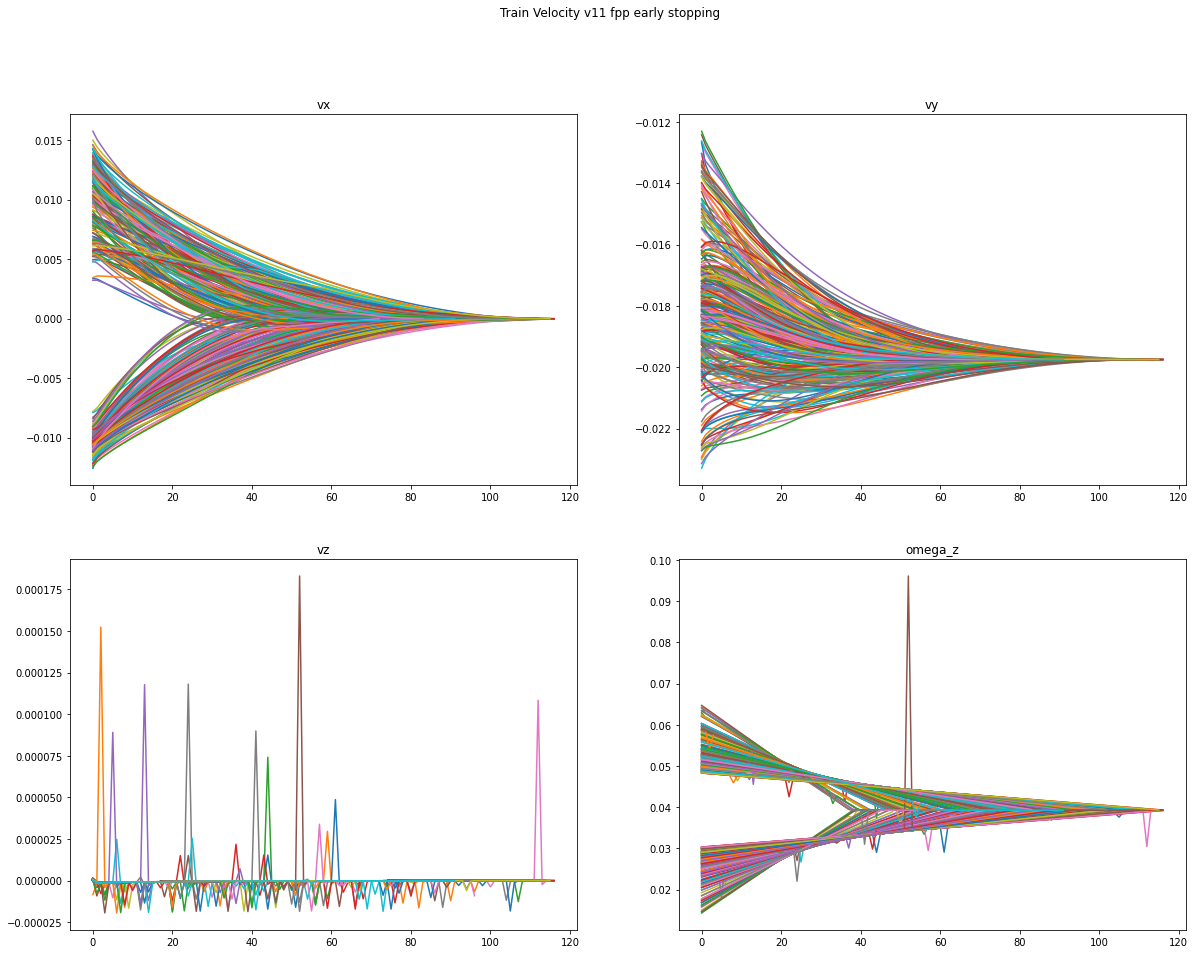

In [12]:
folder_path = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_fpp_early"

vels = [[], [], [], []]
# extract all columns from vel_csv and plot each:
for sub_folder in os.listdir(folder_path):
    # aggregate each of the 4 columns into a list
    vel = np.loadtxt(os.path.join(folder_path, sub_folder, "data_out.csv"), delimiter=",", skiprows=1)
    for i in range(4):
        vels[i].append(vel[:, i])

x, y, z, omega = vels

last_xs = []
for run in x:
    last_xs.append(run[-1])

print(f"mean: {np.mean(last_xs)}")
print(f"std: {np.std(last_xs)}")
print(f"min: {np.min(last_xs)}")
print(f"max: {np.max(last_xs)}")

# create panel of 2 x 2 plots
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Train Velocity v11 fpp early stopping')
# plot each of the 4 columns in a different subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_title(["vx", "vy", "vz", "omega_z"][i])
    for run in vels[i]:
        ax.plot(run)

mean: -1.875302235255017e-05
std: 1.1177625088047978e-05
min: -4.738402936743235e-05
max: -4.331097095319411e-06


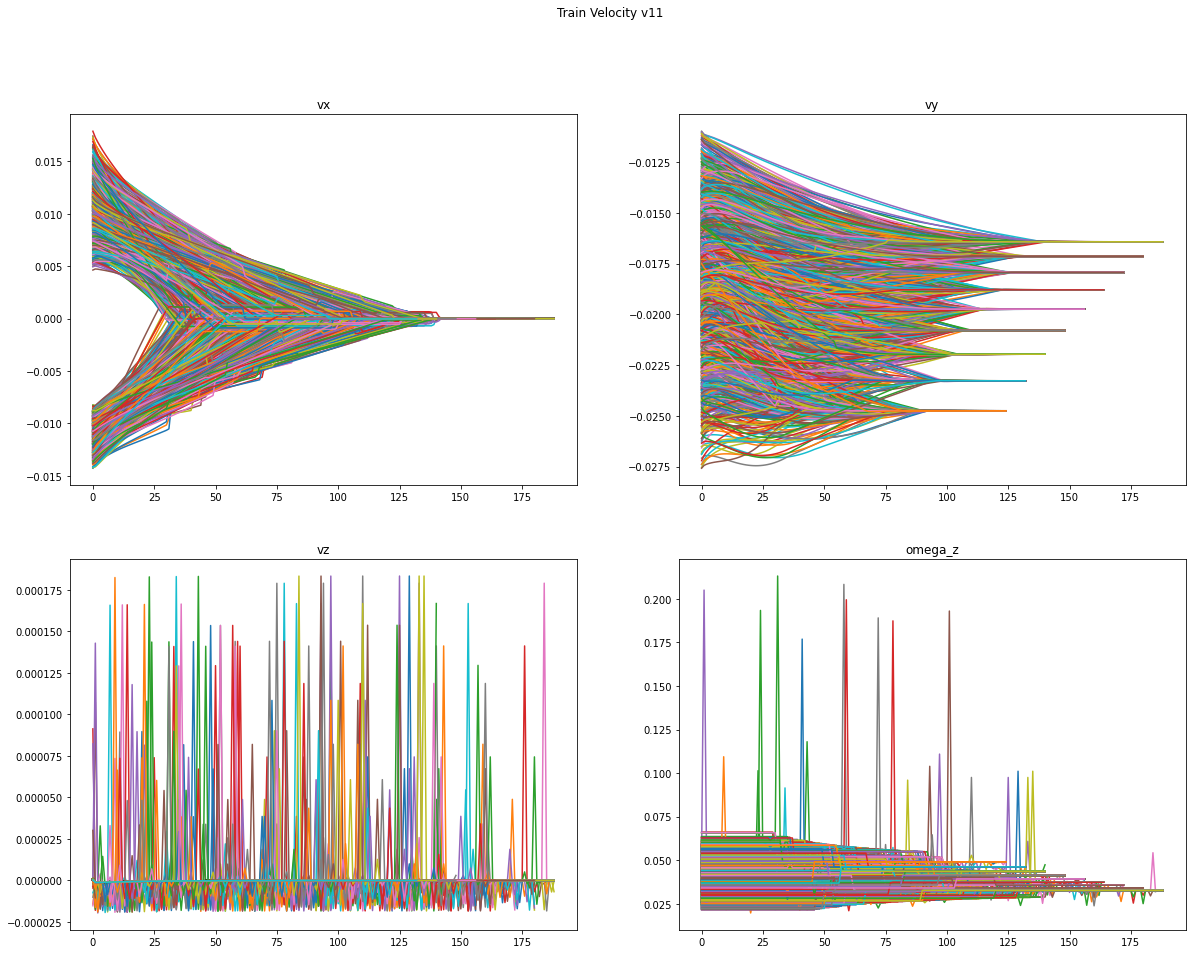

In [13]:
folder_path = "/home/makramchahine/repos/drone_multimodal/clean_train_v11"

vels = [[], [], [], []]
# extract all columns from vel_csv and plot each:
for sub_folder in os.listdir(folder_path):
    # aggregate each of the 4 columns into a list
    vel = np.loadtxt(os.path.join(folder_path, sub_folder, "data_out.csv"), delimiter=",", skiprows=1)
    for i in range(4):
        vels[i].append(vel[:, i])

x, y, z, omega = vels

last_xs = []
for run in x:
    last_xs.append(run[-1])

print(f"mean: {np.mean(last_xs)}")
print(f"std: {np.std(last_xs)}")
print(f"min: {np.min(last_xs)}")
print(f"max: {np.max(last_xs)}")

# create panel of 2 x 2 plots
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle("Train Velocity v11")
# plot each of the 4 columns in a different subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_title(["vx", "vy", "vz", "omega_z"][i])
    for run in vels[i]:
        ax.plot(run)


In [53]:
folder_path = "/home/makramchahine/repos/drone_multimodal/clean_train_v11_fp"

vels = [[], [], [], []]
# extract all columns from vel_csv and plot each:
for sub_folder in os.listdir(folder_path):
    # aggregate each of the 4 columns into a list
    vel = np.loadtxt(os.path.join(folder_path, sub_folder, "data_out.csv"), delimiter=",", skiprows=1)
    for i in range(4):
        vels[i].append(vel[:, i])

x, y, z, omega = vels

last_xs = []
for run in x:
    last_xs.append(run[-1])

print(f"mean: {np.mean(last_xs)}")
print(f"std: {np.std(last_xs)}")
print(f"min: {np.min(last_xs)}")
print(f"max: {np.max(last_xs)}")

# create panel of 2 x 2 plots
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Train Velocity v11_fp')
# plot each of the 4 columns in a different subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_title(["vx", "vy", "vz", "omega_z"][i])
    for run in vels[i]:
        ax.plot(run)

mean: -1.6049467905669622e-05
std: 3.0345913540228804e-06
min: -1.9083662703762994e-05
max: -1.2130367094700945e-05


## Sanity Check

In [20]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# create black image of size 244 x 168
IMAGE_SHAPE = (144, 256, 3)
img = np.zeros(IMAGE_SHAPE, np.uint8)
folder_path = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/sanity_check_black/"
# make path directory if it doesn't exist
if not os.path.exists(path):
    os.makedirs(path)

for i in range(300):
    run_folder = os.path.join(folder_path, f"run_{str(i).zfill(6)}")
    if not os.path.exists(run_folder):
        os.makedirs(run_folder)

    # create signal that is binary, 1 for 40-60 frames, 0 for 40-60 frames, then 1 for the remaining frames
    signal = np.zeros(120)
    start = np.random.randint(40, 60)
    end = np.random.randint(80, 100)
    np.put(signal, range(start, end), 1)

    csv_data = []

    # save image as png with naming scheme "000000.png"
    for i in range(120):
        Image.fromarray(img).save(os.path.join(run_folder, str(i).zfill(6) + ".png"))
        if signal[i] == 1:
            csv_data.append([0.01, 0.008, 0.02, 0.02])
        else:
            csv_data.append([0.001, -0.01, 0.01, 0.03])

        # img.save(os.path.join(path,str(i).zfill(6)+".png"))

    csv_data = np.array(csv_data, dtype=np.float32)
    csv_header = "vx,vy,vz,omega_z"
    np.savetxt(os.path.join(run_folder, "data_out.csv"), csv_data, delimiter=",", header=csv_header, comments="", fmt="%f")

    signal_vector = [[1,0] if value == 1 else [0,1] for value in signal]
    csv_in = np.array(signal_vector, dtype=np.int32)
    csv_header = "L,R"
    np.savetxt(os.path.join(run_folder, "data_in.csv"), csv_in, delimiter=",", header=csv_header, comments="", fmt="%i")


plt.plot(signal)


In [30]:
import numpy as np
import matplotlib.pyplot as plt

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/sanity_check_black/run_000000/data_out.csv"
# extract columns from vel_csv and plot each
vel_true = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
# plt subfigure with 2 rows and 1 column
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
axs[0].plot(vel_true[:, 0], label="vx")
axs[0].plot(vel_true[:, 1], label="vy")
axs[0].plot(vel_true[:, 2], label="vz")
axs[1].plot(vel_true[:, 3], label="omega_z")
fig.suptitle("Train Velocity sanity_check_black")
axs[1].set_title("frame")
fig.legend()
fig.show()

vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_sanity_check_black/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
axs[0].plot(vel_pred[:, 0], label="vx")
axs[0].plot(vel_pred[:, 1], label="vy")
axs[0].plot(vel_pred[:, 2], label="vz")
axs[1].plot(vel_pred[:, 3], label="omega_z")
fig.suptitle("Replay Velocity sanity_check_black")
axs[1].set_title("frame")

fig.legend()
fig.show()

# vel_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_v11_fpp_early_ss/vel_cmd.csv"
# # extract columns from vel_csv and plot each
# vel_pred = np.loadtxt(vel_csv, delimiter=",", skiprows=1)
# plt.plot(vel_pred[:, 0], label="vx")
# plt.plot(vel_pred[:, 1], label="vy")
# plt.plot(vel_pred[:, 2], label="vz")
# plt.plot(vel_pred[:, 3], label="omega_z")
# plt.title("Replay Velocity v11_fpp_early_ss")
# plt.xlabel("frame")

# plt.legend()

[0.00051417 0.00038999 0.00224355 0.0029795 ]
0.0061272079831994775


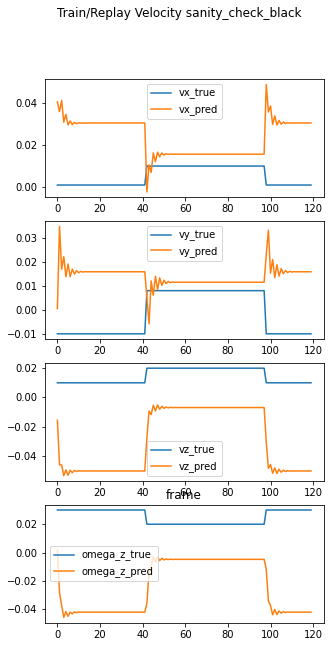

In [7]:
true_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/sanity_check_black/run_000000/data_out.csv"
pred_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_sanity_check_black/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(pred_csv, delimiter=",", skiprows=1)
vel_true = np.loadtxt(true_csv, delimiter=",", skiprows=1)
# plt subfigure with 2 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(5, 10))

axs[0].plot(vel_true[:, 0], label="vx_true")
axs[0].plot(vel_pred[:, 0], label="vx_pred")

axs[1].plot(vel_true[:, 1], label="vy_true")
axs[1].plot(vel_pred[:, 1], label="vy_pred")

axs[2].plot(vel_true[:, 2], label="vz_true")
axs[2].plot(vel_pred[:, 2], label="vz_pred")

axs[3].plot(vel_true[:, 3], label="omega_z_true")
axs[3].plot(vel_pred[:, 3], label="omega_z_pred")

fig.suptitle("Train/Replay Velocity sanity_check_black")
axs[3].set_title("frame")

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
fig.show()

loss = np.mean((vel_true - vel_pred)**2, axis=0)
print(loss)
print(np.sum(loss))


[1.73061343e-07 9.32963434e-07 3.23981332e-07 2.80778921e-07]
1.7107850296663295e-06


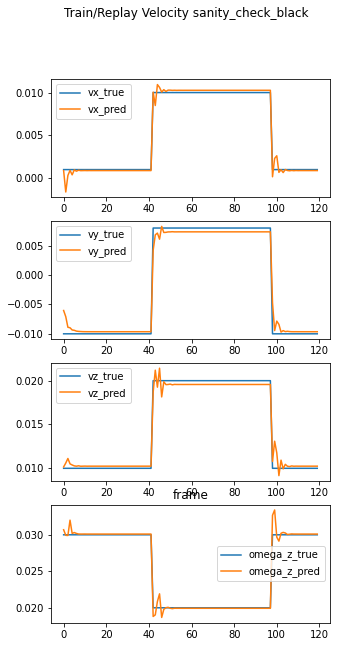

In [6]:
true_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/sanity_check_black/run_000000/data_out.csv"
pred_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_sanity_check_black_200/vel_cmd.csv"
# extract columns from vel_csv and plot each
vel_pred = np.loadtxt(pred_csv, delimiter=",", skiprows=1)
vel_true = np.loadtxt(true_csv, delimiter=",", skiprows=1)
# plt subfigure with 2 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(5, 10))

axs[0].plot(vel_true[:, 0], label="vx_true")
axs[0].plot(vel_pred[:, 0], label="vx_pred")

axs[1].plot(vel_true[:, 1], label="vy_true")
axs[1].plot(vel_pred[:, 1], label="vy_pred")

axs[2].plot(vel_true[:, 2], label="vz_true")
axs[2].plot(vel_pred[:, 2], label="vz_pred")

axs[3].plot(vel_true[:, 3], label="omega_z_true")
axs[3].plot(vel_pred[:, 3], label="omega_z_pred")

fig.suptitle("Train/Replay Velocity sanity_check_black")
axs[3].set_title("frame")

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
fig.show()

loss = np.mean((vel_true - vel_pred)**2, axis=0)
print(loss)
print(np.sum(loss))


[0.00051417 0.00038999 0.00224355 0.0029795 ]
0.0061272079831994775
[1.73061343e-07 9.32963434e-07 3.23981332e-07 2.80778921e-07]
1.7107850296663295e-06


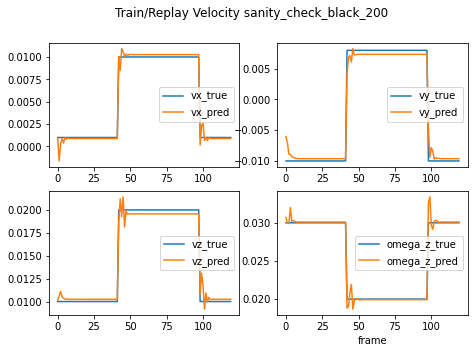

In [111]:
model = "sanity_check_black"
true_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/sanity_check_black/run_000000/data_out.csv"
pred_csv = f"/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_{model}/vel_cmd.csv"

plot_comparison(true_csv, pred_csv, model)

model = "sanity_check_black_200"
true_csv = "/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/sanity_check_black/run_000000/data_out.csv"
pred_csv = f"/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/replay_{model}/vel_cmd.csv"

plot_comparison(true_csv, pred_csv, model)

### Replay comparison

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for DEFAULT_VEL_FREQ_HZ in [8, 60, 120, 240]:
    DEFAULT_OUTPUT_FOLDER = f'train_debug_{DEFAULT_VEL_FREQ_HZ}'
    controls_csv_path = f'/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/train_debug_{DEFAULT_VEL_FREQ_HZ}/data_out.csv'
    pos_csv_path = f'{DEFAULT_OUTPUT_FOLDER}/pos.csv'

    # extract columns from vel_csv and plot each
    vel_true = np.loadtxt(controls_csv_path, delimiter=",", skiprows=1)
    pos_true = np.loadtxt(pos_csv_path, delimiter=",", skiprows=1)

    axs[0].plot(np.linspace(0, 1, len(vel_true)), vel_true[:, 0], label=f"{DEFAULT_VEL_FREQ_HZ}Hz")
    axs[1].plot(np.linspace(0, 1, len(vel_true)), vel_true[:, 1], label=f"{DEFAULT_VEL_FREQ_HZ}Hz")
    axs[2].plot(np.linspace(0, 1, len(vel_true)), vel_true[:, 2], label=f"{DEFAULT_VEL_FREQ_HZ}Hz")
    axs[3].plot(np.linspace(0, 1, len(pos_true)), pos_true[:, 3], label=f"{DEFAULT_VEL_FREQ_HZ}Hz")

for ax, title in zip(axs, ["vx", "vy", "vz", "yaw"]):
    ax.legend()
    ax.set_title(title)

fig.suptitle("Velocity and yaw commands for different RECORDING frequencies")

Text(0.5, 0.98, 'Velocity and yaw commands for different RECORDING frequencies')

Text(0.5, 0.98, 'Velocity and yaw commands for different RECORDING frequencies')

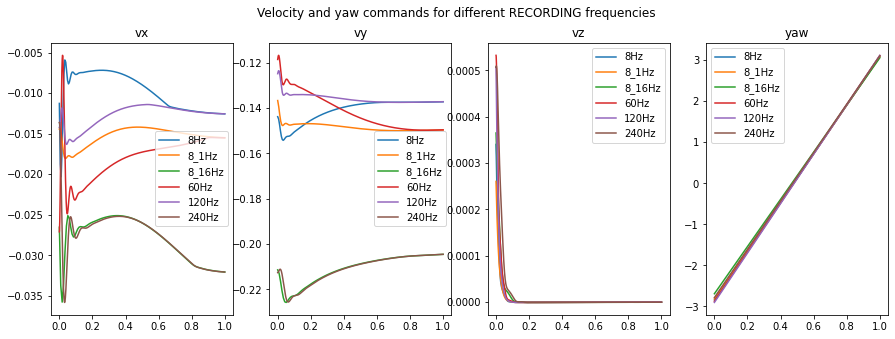

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for DEFAULT_VEL_FREQ_HZ in [8, "8_1", "8_16", 60, 120, 240]:
    DEFAULT_OUTPUT_FOLDER = f'train_debug_{DEFAULT_VEL_FREQ_HZ}'
    controls_csv_path = f'/home/makramchahine/repos/gym-pybullet-drones/gym_pybullet_drones/examples/train_debug_{DEFAULT_VEL_FREQ_HZ}/data_out.csv'
    pos_csv_path = f'{DEFAULT_OUTPUT_FOLDER}/pos.csv'

    # extract columns from vel_csv and plot each
    vel_true = np.loadtxt(controls_csv_path, delimiter=",", skiprows=1)
    pos_true = np.loadtxt(pos_csv_path, delimiter=",", skiprows=1)

    axs[0].plot(np.linspace(0, 1, len(vel_true)), vel_true[:, 0], label=f"{DEFAULT_VEL_FREQ_HZ}Hz")
    axs[1].plot(np.linspace(0, 1, len(vel_true)), vel_true[:, 1], label=f"{DEFAULT_VEL_FREQ_HZ}Hz")
    axs[2].plot(np.linspace(0, 1, len(vel_true)), vel_true[:, 2], label=f"{DEFAULT_VEL_FREQ_HZ}Hz")
    axs[3].plot(np.linspace(0, 1, len(pos_true)), pos_true[:, 3], label=f"{DEFAULT_VEL_FREQ_HZ}Hz")

for ax, title in zip(axs, ["vx", "vy", "vz", "yaw"]):
    ax.legend()
    ax.set_title(title)

fig.suptitle("Velocity and yaw commands for different RECORDING frequencies")